Group 11:
Members:
Evita Vardhani
Hyeonhui Lee
Jessica Wong Ying En
Jing Chen

In [2]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
# extracting tar file content
import tarfile
tar = tarfile.open('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/BreaKHis_v1.tar.gz','r:gz')
tar.extractall()
tar.close()

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import os, sys
import re
import shutil

In [ ]:

# import torch as t
# import torchvision as tv
# import torch.nn.functional as F

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, recall_score, precision_score

# def get_filenames(label='benign', rootfolder = 'breast', magnification='400X', maxFiles=-1):
#     """
#     Gets filenames of images with the label and magnification chosen from BreakHis dataset
#     """
#     filenames = []

#     label_folder = os.path.join("BreaKHis_v1/histology_slides/breast", label, 'SOB')
#     # label_folder = os.path.join(rootfolder, label, 'SOB')

#     for root, dirs, files in os.walk(label_folder):
#         if magnification in root:
#             for file in files:
#                 filenames.append(os.path.join(root, file))
#                 if len(filenames) == maxFiles:
#                     break   # out of inner loop
#             else:
#                 continue
#             break   # out of outer loop upon reaching maxFiles

#     return filenames

# maxFiles = 50000
# filenames0 = get_filenames(label='benign', maxFiles=maxFiles)
# filenames1 = get_filenames(label='malignant', maxFiles=maxFiles)

# maxFiles = 50000 # cap number of files retrieved at 5000
# filenames0 = get_filenames(label='benign', maxFiles=maxFiles)
# filenames1 = get_filenames(label='malignant', maxFiles=maxFiles)

# X = filenames0 + filenames1
# y = [0.]*len(filenames0) + [1.]*len(filenames1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# print(y_train)

[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0,

In [ ]:
#path to extract .txt file names
benign_path = '/content/BreaKHis_v1/histology_slides/breast/benign/'
malignant_path = '/content/BreaKHis_v1/histology_slides/breast/malignant/'

# extract all .txt files in folders benign and malignant
pattern = r"\w+.stat.txt$"
benign_txt = [x for x in os.listdir(benign_path) if re.match(pattern,x)]
malignant_txt = [x for x in os.listdir(malignant_path) if re.match(pattern,x)]

# print(malignant_txt)

In [ ]:
benign_img_files = []

# create list of benign files to access
for filename in benign_txt:
  path = benign_path + filename
  file = open(path, 'r')
  lines = [re.sub(r"\s:\s\d+\n","",line) for line in file]
  benign_img_files.append(lines)

# unpack list of lists
benign_img_files = [x for file_name in benign_img_files for x in file_name]

# extract 200X resolution file names
# benign_img_files = [x for x in benign_img_files if re.search(r'200X$',x)]

# extract 40X resolution file names
benign_img_files = [x for x in benign_img_files if re.search(r'40X$',x)]

# benign_destination_dir = '/content/drive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/benign/'

destination_dir = '/content/drive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/'

benign_imgs_path = []

# extract list of benign img path
for folder_name in benign_img_files:
  path = benign_path + folder_name
  list_of_imgs = os.listdir(path) # list out images in the magnification folder
  for file_name in list_of_imgs:
      benign_source_dir = os.path.join(path, file_name)
      benign_imgs_path.append(benign_source_dir)
      # shutil.copy(source_dir, destination_dir)

In [ ]:
import random

data_path = '/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/'

# benign_imgs_list = [filename for filename in os.listdir(benign_destination_dir)]

random.seed(123)
random.shuffle(benign_imgs_path)

train_folder = os.path.join(data_path, 'train', 'benign')
test_folder = os.path.join(data_path, 'test', 'benign')
val_folder = os.path.join(data_path, 'eval','benign')

# create train/test/val folders if they do not exist
for folder_path in [train_folder, val_folder, test_folder]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

train_size = int(len(benign_imgs_path) * 0.70)
test_size = int(len(benign_imgs_path) * 0.15)
val_size = int(len(benign_imgs_path) * 0.15)

for i, f in enumerate(benign_imgs_path):
  if i < train_size:
    dest_folder = train_folder
  elif i < train_size + val_size:
    dest_folder = val_folder
  else:
    dest_folder = test_folder
  shutil.copy(os.path.join(f), os.path.join(dest_folder, os.path.basename(f)))

In [ ]:
malignant_img_files = []

# create list of malignant files to access
for filename in malignant_txt:
  path = malignant_path + filename
  file = open(path, 'r')
  lines = [re.sub(r"\s:\s\d+\n","",line) for line in file]
  malignant_img_files.append(lines)

# unpack list of lists
malignant_img_files = [x for file_name in malignant_img_files for x in file_name]

# extract 200X resolution file names
# malignant_img_files = [x for x in malignant_img_files if re.search(r'200X$',x)]

# extract 40X resolution file names
malignant_img_files = [x for x in malignant_img_files if re.search(r'40X$',x)]

# malignant_destination_dir = '/content/drive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/malignant/'

destination_dir = '/content/drive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/'

malignant_imgs_path = []

# copy malignant images to google drive
for folder_name in malignant_img_files:
  path = malignant_path + folder_name
  list_of_imgs = os.listdir(path)
  for file_name in list_of_imgs:
      malignant_source_dir = os.path.join(path, file_name)
      malignant_imgs_path.append(malignant_source_dir)


In [ ]:
random.seed(123)
random.shuffle(malignant_imgs_path)

train_folder = os.path.join(data_path, 'train', 'malignant')
test_folder = os.path.join(data_path, 'test', 'malignant')
val_folder = os.path.join(data_path, 'eval','malignant')

# create train/test/val folders if they do not exist
for folder_path in [train_folder, val_folder, test_folder]:
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

train_size = int(len(malignant_imgs_path) * 0.70)
test_size = int(len(malignant_imgs_path) * 0.15)
val_size = int(len(malignant_imgs_path) * 0.15)

for i, f in enumerate(malignant_imgs_path):
  if i < train_size:
    dest_folder = train_folder
  elif i < train_size + val_size:
    dest_folder = val_folder
  else:
    dest_folder = test_folder
  shutil.copy(os.path.join(f), os.path.join(dest_folder, os.path.basename(f)))

START OF EXPLORATORY DATA ANALYSIS

In [5]:
print(f'Image Distribution for Benign at 40x magnification:')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/train/benign"))} pictures in train.')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/test/benign"))} pictures in test.')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/eval/benign"))} pictures in evaluation.')


Image Distribution for Benign at 40x magnification:
437 pictures in train.
95 pictures in test.
93 pictures in evaluation.


In [8]:
print(f'Image Distribution for Malignant at 40x magnification:')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/train/malignant"))} pictures in train.')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/test/malignant"))} pictures in test.')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/eval/malignant"))} pictures in evaluation.')


Image Distribution for Malignant at 40x magnification:
958 pictures in train.
207 pictures in test.
205 pictures in evaluation.


In [9]:
print(f'Image Distribution for Benign at 200x magnification:')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/train/benign"))} pictures in train.')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/test/benign"))} pictures in test.')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/eval/benign"))} pictures in evaluation.')


Image Distribution for Benign at 200x magnification:
436 pictures in train.
94 pictures in test.
93 pictures in evaluation.


In [10]:
print(f'Image Distribution for Malignant at 200x magnification:')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/train/malignant"))} pictures in train.')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/test/malignant"))} pictures in test.')
print(f'{len(os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/eval/malignant"))} pictures in evaluation.')


Image Distribution for Malignant at 200x magnification:
972 pictures in train.
210 pictures in test.
208 pictures in evaluation.


In [16]:
# list of img file names
img_names_200x = []

for root, dirs, files in os.walk("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/", topdown=False):
   for name in files:
    img_names_200x.append(name)

In [17]:
temp = img_names_200x
print(temp)

['SOB_B_PT-14-21998AB-200-002.png', 'SOB_B_TA-14-16184-200-004.png', 'SOB_B_TA-14-3411F-200-004.png', 'SOB_B_TA-14-16184-200-019.png', 'SOB_B_TA-14-16184CD-200-005.png', 'SOB_B_F-14-25197-200-049.png', 'SOB_B_F-14-21998CD-200-031.png', 'SOB_B_TA-14-19854C-200-015.png', 'SOB_B_F-14-23060AB-200-005.png', 'SOB_B_F-14-14134E-200-019.png', 'SOB_B_F-14-21998CD-200-032.png', 'SOB_B_F-14-29960AB-200-005.png', 'SOB_B_PT-14-21998AB-200-013.png', 'SOB_B_A-14-22549AB-200-013.png', 'SOB_B_A-14-22549G-200-010.png', 'SOB_B_A-14-22549AB-200-028.png', 'SOB_B_F-14-21998CD-200-029.png', 'SOB_B_F-14-25197-200-033.png', 'SOB_B_PT-14-21998AB-200-032.png', 'SOB_B_A-14-22549CD-200-004.png', 'SOB_B_TA-14-3411F-200-008.png', 'SOB_B_A-14-29960CD-200-005.png', 'SOB_B_PT-14-22704-200-007.png', 'SOB_B_TA-14-3411F-200-012.png', 'SOB_B_A-14-22549AB-200-007.png', 'SOB_B_A-14-29960CD-200-004.png', 'SOB_B_F-14-21998EF-200-013.png', 'SOB_B_PT-14-21998AB-200-021.png', 'SOB_B_F-14-29960AB-200-003.png', 'SOB_B_PT-14-22704-2

In [19]:
img_names_200x = [i.split('_') for i in img_names_200x]

In [20]:
img_names_200x = pd.DataFrame(img_names_200x,columns=['SOB', 'Label','ImageNum'])
img_names_200x.head(5)

,SOB,Label,ImageNum
0,SOB,B,PT-14-21998AB-200-002.png
1,SOB,B,TA-14-16184-200-004.png
2,SOB,B,TA-14-3411F-200-004.png
3,SOB,B,TA-14-16184-200-019.png
4,SOB,B,TA-14-16184CD-200-005.png


In [11]:
img_names_200x['Path'] = temp
img_names_200x.head(5)

,SOB,Label,ImageNum,Path
0,SOB,B,PT-14-21998AB-200-002.png,SOB_B_PT-14-21998AB-200-002.png
1,SOB,B,TA-14-16184-200-004.png,SOB_B_TA-14-16184-200-004.png
2,SOB,B,TA-14-3411F-200-004.png,SOB_B_TA-14-3411F-200-004.png
3,SOB,B,TA-14-16184-200-019.png,SOB_B_TA-14-16184-200-019.png
4,SOB,B,TA-14-16184CD-200-005.png,SOB_B_TA-14-16184CD-200-005.png


In [21]:
img_names_200x.insert(2,'Type',img_names_200x['ImageNum'].str.extract(r'^(\w{1,3})'))
img_names_200x.insert(3,'PatientID', img_names_200x['ImageNum'].str.extract(r'(\d{2}-\w+)'))
img_names_200x = img_names_200x.drop(['SOB'], axis = 1)
img_names_200x.head(5)

,Label,Type,PatientID,ImageNum
0,B,PT,14-21998AB,PT-14-21998AB-200-002.png
1,B,TA,14-16184,TA-14-16184-200-004.png
2,B,TA,14-3411F,TA-14-3411F-200-004.png
3,B,TA,14-16184,TA-14-16184-200-019.png
4,B,TA,14-16184CD,TA-14-16184CD-200-005.png


In [93]:
# Number of Unique Patients
print(len(pd.unique(img_names_200x['PatientID'])))

81


In [32]:
img_pivot = pd.pivot_table(
	img_names_200x,
	values="Type",
	index="   ",
	columns="Type",
	aggfunc=np.sum
)

ValueError: ignored

<Axes: title={'center': 'Distribution of Classes'}>

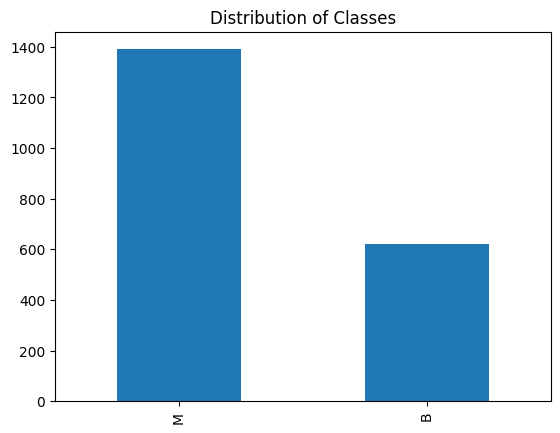

In [31]:
img_names_200x['Label'].value_counts().plot(kind='bar', title = 'Distribution of Classes')


In [12]:
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
fig = plt.figure(figsize=(25, 4))
# display 20 images
train_imgs = os.listdir("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/train/benign")
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    im = Image.open("/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/train/benign" + img)
    plt.imshow(im)
    lab = labels.loc[labels['id'] == img.split('.')[0], 'label'].values[0]
    ax.set_title(f'Label: {lab}')

In [ ]:
# import random

# data_path = '/content/drive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/'

# benign_imgs_list = [filename for filename in os.listdir(benign_destination_dir)]

# random.seed(123)
# random.shuffle(benign_imgs_list)

# train_folder = os.path.join(data_path, 'train', 'benign')
# test_folder = os.path.join(data_path, 'test', 'benign')
# val_folder = os.path.join(data_path, 'eval','benign')

# # create train/test/val folders if they do not exist
# for folder_path in [train_folder, val_folder, test_folder]:
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)

# train_size = int(len(benign_imgs_list) * 0.70)
# test_size = int(len(benign_imgs_list) * 0.15)
# val_size = int(len(benign_imgs_list) * 0.15)

# for i, f in enumerate(benign_imgs_list):
#   if i < train_size:
#     dest_folder = train_folder
#   elif i < train_size + val_size:
#     dest_folder = val_folder
#   else:
#     dest_folder = test_folder
#   shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))
# #   # shutil.copy((benign_destination_dir+f), dest_folder)

In [ ]:
# import random

# data_path = '/content/drive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/benign/'

# benign_imgs_list = [filename for filename in os.listdir(benign_destination_dir)]

# random.seed(123)
# random.shuffle(benign_imgs_list)

# train_folder = os.path.join(data_path, 'train')
# test_folder = os.path.join(data_path, 'test')
# val_folder = os.path.join(data_path, 'eval')

# for folder_path in [train_folder, val_folder, test_folder]:
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)

# train_size = int(len(benign_imgs_list) * 0.70)
# test_size = int(len(benign_imgs_list) * 0.15)
# val_size = int(len(benign_imgs_list) * 0.15)

# for i, f in enumerate(benign_imgs_list):
#   if i < train_size:
#     dest_folder = train_folder
#   elif i < train_size + val_size:
#     dest_folder = val_folder
#   else:
#     dest_folder = test_folder
#   shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))
# #   # shutil.copy((benign_destination_dir+f), dest_folder)

In [ ]:
# data_path = '/content/drive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/malignant/'

# malignant_imgs_list = [filename for filename in os.listdir(malignant_destination_dir)]

# random.seed(123)
# random.shuffle(malignant_imgs_list)

# train_folder = os.path.join(data_path, 'train')
# test_folder = os.path.join(data_path, 'test')
# val_folder = os.path.join(data_path, 'eval')

# for folder_path in [train_folder, val_folder, test_folder]:
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)

# train_size = int(len(malignant_imgs_list) * 0.70)
# test_size = int(len(malignant_imgs_list) * 0.15)
# val_size = int(len(malignant_imgs_list) * 0.15)

# for i, f in enumerate(malignant_imgs_list):
#   if i < train_size:
#     dest_folder = train_folder
#   elif i < train_size + val_size:
#     dest_folder = val_folder
#   else:
#     dest_folder = test_folder
#   shutil.copy(os.path.join(data_path, f), os.path.join(dest_folder, f))

In [ ]:
# delete img files outside of folders:
imgs = os.listdir(malignant_destination_dir)
for img in imgs:
  if img.endswith('.png'):
    os.remove(os.path.join(malignant_destination_dir, img))

In [ ]:
imgs = os.listdir(benign_destination_dir)
for img in imgs:
  if img.endswith('.png'):
    os.remove(os.path.join(benign_destination_dir, img))